# Preprocessing Data

In [1]:
# import package
import sys
import numpy as np
import pandas as pd

In [2]:
# load dataset
datasets = {
    'kale' : '../datasets/dataset_kale.csv',
    'seledri' : '../datasets/dataset_seledri.csv'
}

raw_data = {}
for plant_name, path in datasets.items():
    raw_data[plant_name] = pd.read_csv(path)

In [3]:
# preprocessing
# set label kale
# 1 - 3 - 5 - 2 - 4 ( Optimal - Non Optimal)

# set label seledri
# 2 - 5 - 1 - 4 - 3 ( Optimal - Non Optimal)
optimal_list = {
    'kale' : ['Kale1',
                'Kale3',
               'Kale5',
              ],
    'seledri' : ['Seledri 2',
                'Seledri 5',
                'Seledri 1',]
}

not_optimal_list = {
    'kale' : ['Kale2',
               'Kale4'],
    'seledri' : ['Seledri 4',
                'Seledri 3']
}


pre_processing_data = {}

for plant_name, path in datasets.items():
    list_pd = []
    for index, row in raw_data[plant_name].iterrows():
        # change soil moisture to 0 : Low, 50 : Normwl, 100 : High

        if row['name'] in optimal_list[plant_name]:
            # change status to optimal,

            # modify status if low to normal or high, as its not possible to high
            if row['soil_moisture'] == 'Low':
                row['soil_moisture'] = 'Normal'

            row['status'] = 'Optimal'

        elif row['name'] in not_optimal_list[plant_name]:
            # change status to not optimal_list
            row['soil_moisture'] = 'Low' # change soil_moisture to Low
            row['status'] = 'Not Optimal'

        # add new column for numerical features in knn instead of categorical features
        if row['soil_moisture'] == 'Low':
            row['soil_moisture_encode'] = 0

        if row['soil_moisture'] == 'Normal':
            row['soil_moisture_encode'] = 50

        if row['soil_moisture'] == 'High':
            row['soil_moisture_encode'] = 100

        list_pd.append(row)
    pre_processing_data[plant_name] = pd.DataFrame(list_pd)

    # remove nan values
    pre_processing_data[plant_name].dropna(inplace=True)


In [4]:
# save to excel format
preprocessing_save_path = {
    'kale' : '../datasets/kale_datasets_preprocessing.xlsx',
    'seledri' : '../datasets/seledri_datasets_preprocessing.xlsx'
}

for plant_name, saved_path in preprocessing_save_path.items():
    # save prerpocessing result as excel
    pre_processing_data[plant_name].to_excel(saved_path, header=True, index=False)

# Training and Testing Decision Tree Model

just run this step, skip preprocessing step and load from exisiting preprocessing file

In [5]:
# import library
import pickle
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [6]:
# load from preprocessing files
preprocessing_save_path = {
    'kale' : '../datasets/kale_datasets_preprocessing.xlsx',
    'seledri' : '../datasets/seledri_datasets_preprocessing.xlsx'
}
pre_processing_data = {}

for plant_name, saved_path in preprocessing_save_path.items():
    # save prerpocessing result as excel
    pre_processing_data[plant_name] = pd.read_excel(saved_path)

In [7]:
# prepare training and testing data
training_features_column = ['temperature', 'humidity', 'light_intensity', 'soil_moisture_encode']
target_column = ['status']
list_plant_name = ['kale','seledri']
X_train = {}
X_test = {}
y_train = {}
y_test = {}
for plant_name in list_plant_name:
    # Split dataset into training set and test set
    X_train[plant_name], X_test[plant_name], y_train[plant_name], y_test[plant_name] = train_test_split(pre_processing_data[plant_name][training_features_column], pre_processing_data[plant_name][target_column], test_size=0.3)

#pre_processing_data['kale'][training_features_column]

In [8]:
# make model and testing
saved_model_path = {
    'kale' : '../trained/kale_dt_model.sav',
    'seledri' : '../trained/seledri_dt_model.sav'
}

#Train the model using the training sets
for plant_name in list_plant_name:
    # create decision tree classifier
    clf = DecisionTreeClassifier(random_state=0,max_depth=3)

    # train model dt
    decision_tree_clf = clf.fit(X_train[plant_name], np.ravel(y_train[plant_name]))

    #Predict the response for test dataset
    y_pred = decision_tree_clf.predict(X_test[plant_name])

    # Model Accuracy, how often is the classifier correct?'
    clf_report = classification_report(y_test[plant_name], y_pred, target_names=["Optimal", "Not Optimal"])
    accuracy = metrics.accuracy_score(y_test[plant_name], y_pred) * 100

    print(f"Decision Tree Performance Report for {plant_name} models: ")
    print(f"Accuracy : {accuracy:.2f} %")
    print(f"Classification Report : {clf_report}")

    # save the model
    pickle.dump(decision_tree_clf, open(saved_model_path[plant_name].format(accuracy), 'wb'))

Decision Tree Performance Report for kale models: 
Accuracy : 100.00 %
Classification Report :               precision    recall  f1-score   support

     Optimal       1.00      1.00      1.00      7345
 Not Optimal       1.00      1.00      1.00     11216

    accuracy                           1.00     18561
   macro avg       1.00      1.00      1.00     18561
weighted avg       1.00      1.00      1.00     18561

Decision Tree Performance Report for seledri models: 
Accuracy : 100.00 %
Classification Report :               precision    recall  f1-score   support

     Optimal       1.00      1.00      1.00      7084
 Not Optimal       1.00      1.00      1.00     10391

    accuracy                           1.00     17475
   macro avg       1.00      1.00      1.00     17475
weighted avg       1.00      1.00      1.00     17475




# Summary and Analysis

## Dataset

No handles with labels found to put in legend.


Kale Preprocessing Dataframe Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61870 entries, 0 to 61869
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    61870 non-null  int64  
 1   name                  61870 non-null  object 
 2   temperature           61870 non-null  float64
 3   humidity              61870 non-null  float64
 4   light_intensity       61870 non-null  float64
 5   soil_moisture         61870 non-null  object 
 6   status                61870 non-null  object 
 7   time                  61870 non-null  object 
 8   soil_moisture_encode  61870 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 4.2+ MB
None

          id   name  temperature  humidity  light_intensity soil_moisture  \
0         16  Kale1         24.6      87.7          19.5833        Normal   
1         17  Kale2         24.6      87.7          19.5833         

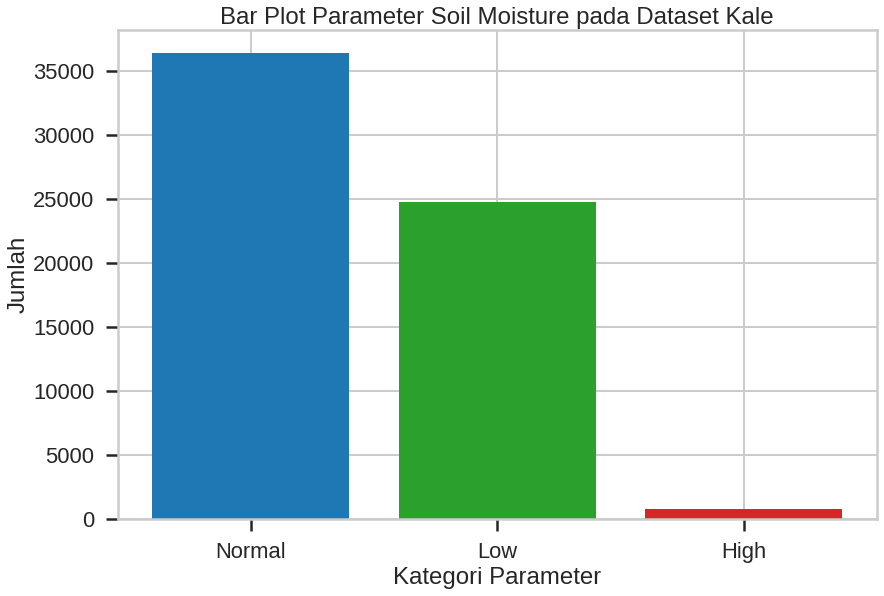

No handles with labels found to put in legend.



Bar Plot Status
Optimal        37122
Not Optimal    24748
Name: status, dtype: int64


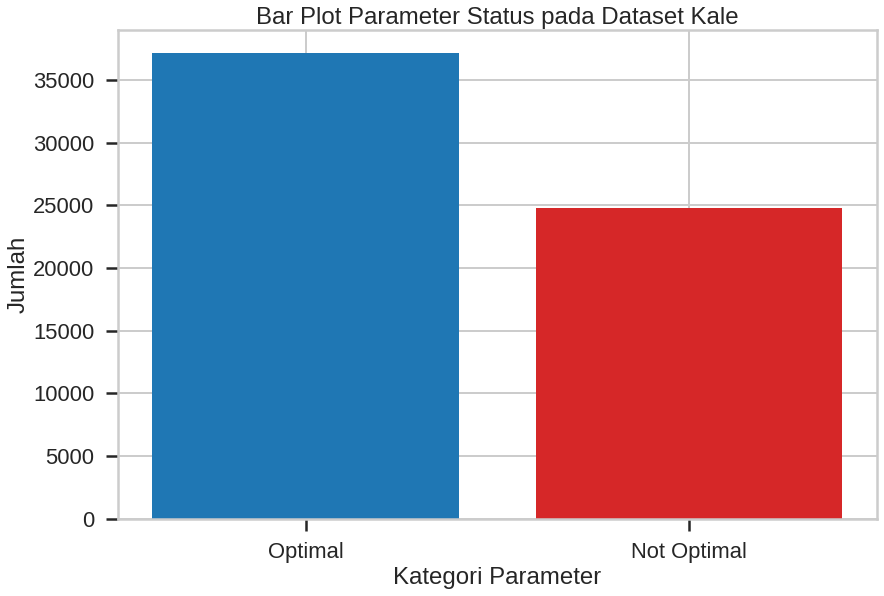

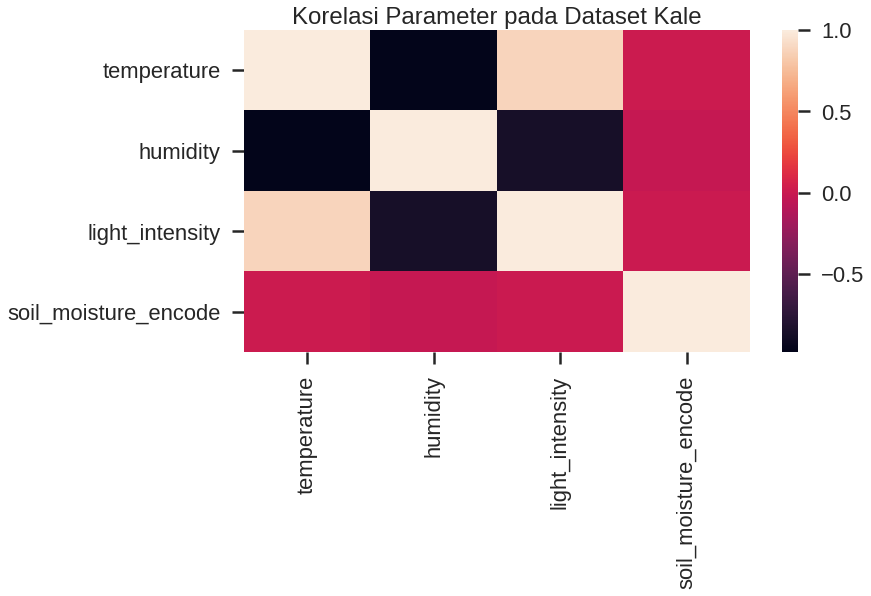

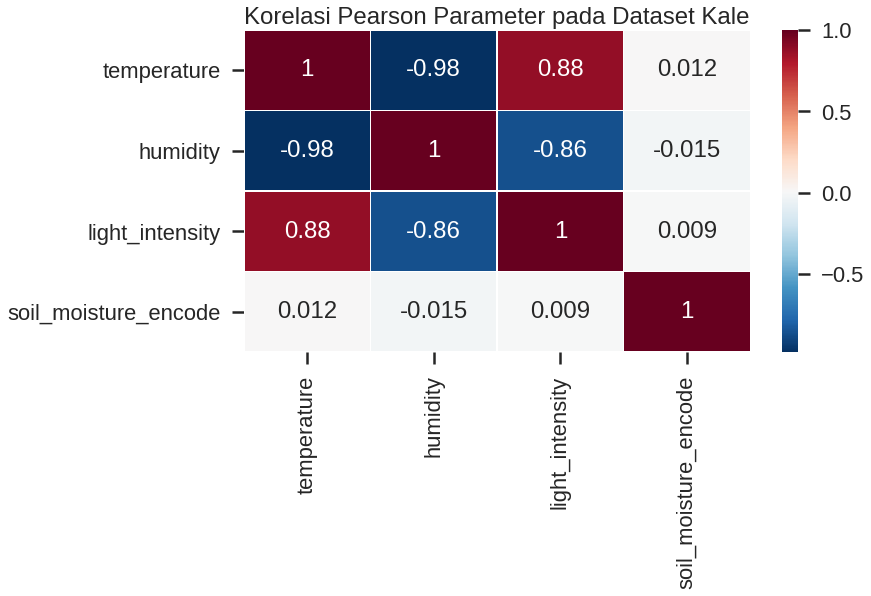

No handles with labels found to put in legend.


Seledri Preprocessing Dataframe Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58250 entries, 0 to 58249
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    58250 non-null  int64  
 1   name                  58250 non-null  object 
 2   temperature           58250 non-null  float64
 3   humidity              58250 non-null  float64
 4   light_intensity       58250 non-null  float64
 5   soil_moisture         58250 non-null  object 
 6   status                58250 non-null  object 
 7   time                  58250 non-null  object 
 8   soil_moisture_encode  58250 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 4.0+ MB
None

          id       name  temperature  humidity  light_intensity soil_moisture  \
0          1  Seledri 1         24.3      93.9          61.6667        Normal   
1          2  Seledri 2         24.3      93.9          6

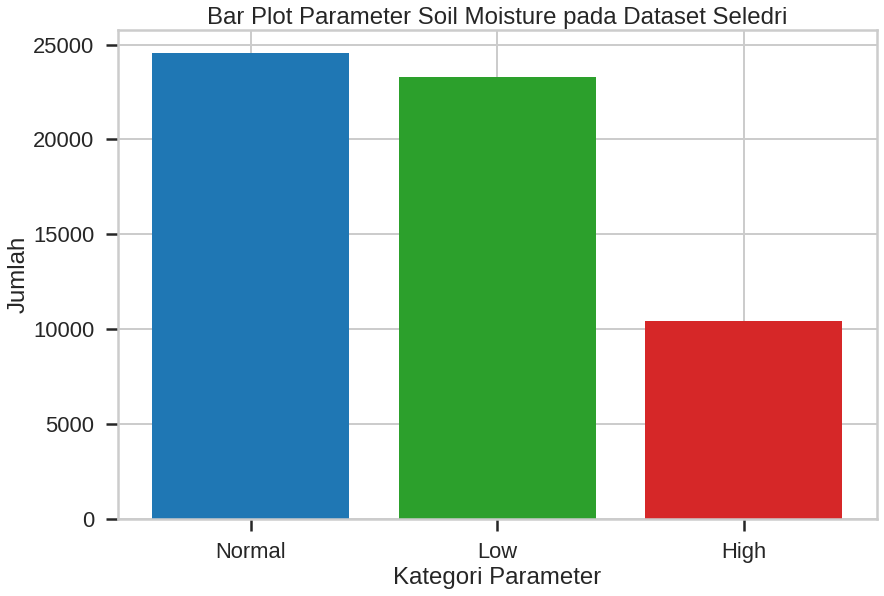

No handles with labels found to put in legend.



Bar Plot Status
Optimal        34950
Not Optimal    23300
Name: status, dtype: int64


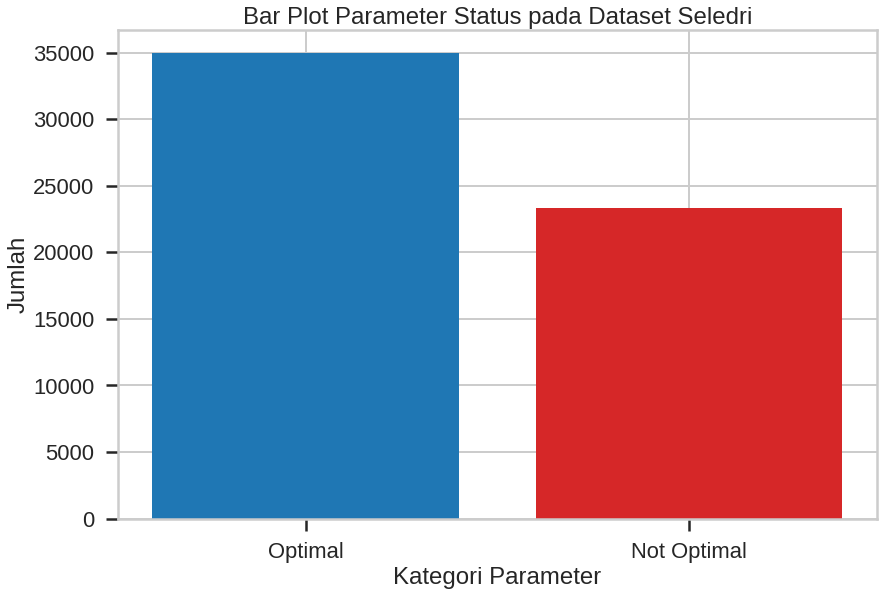

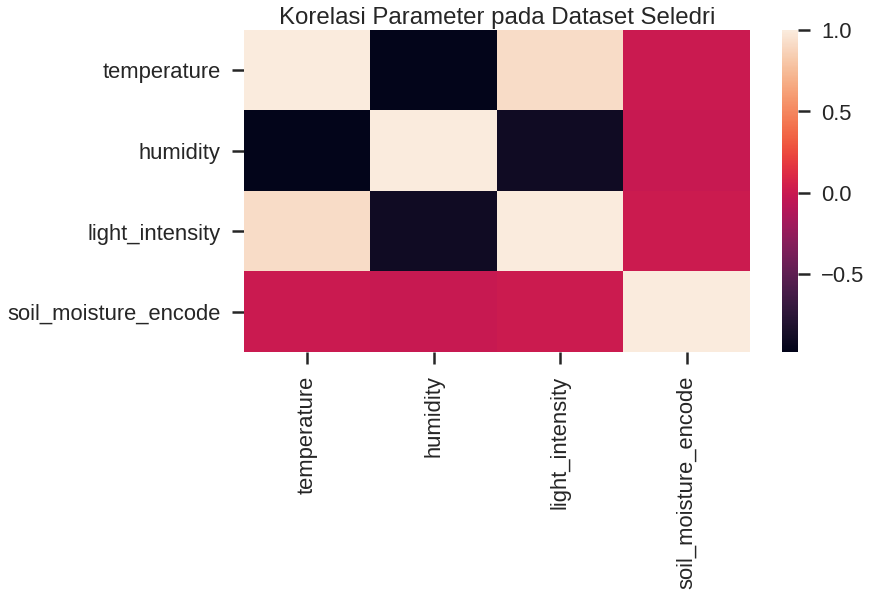

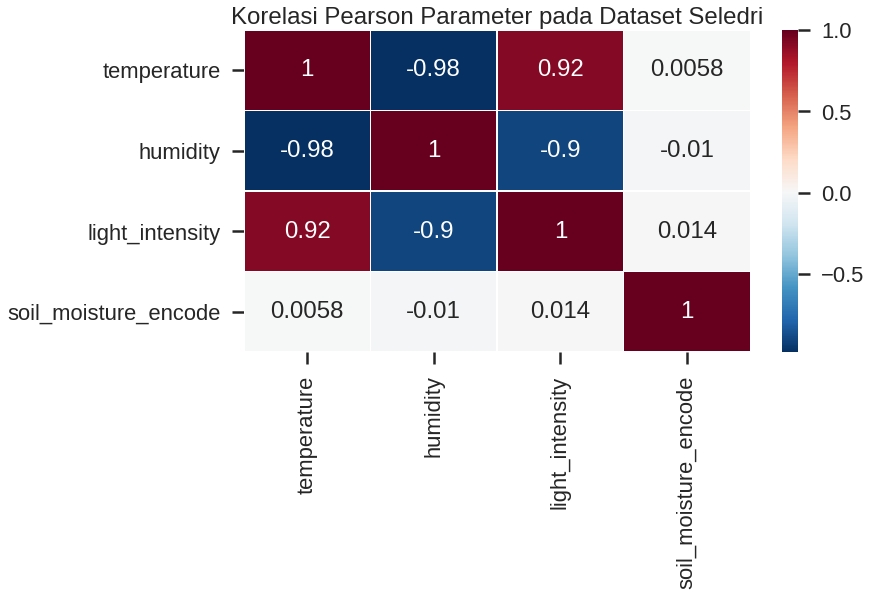

In [24]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.style as style

%matplotlib inline
style.use('seaborn-poster') #sets the size of the charts
style.use('seaborn-whitegrid')
sns.set_context('poster')
## Dataset Analysis
preprocessing_save_path = {
    'kale' : '../datasets/kale_datasets_preprocessing.xlsx',
    'seledri' : '../datasets/seledri_datasets_preprocessing.xlsx'
}
pre_processing_data = {}

for plant_name, saved_path in preprocessing_save_path.items():
    # save prerpocessing result as excel
    print(f"\n{'='*100}") # space
    pre_processing_data[plant_name] = pd.read_excel(saved_path)
    print(f"{plant_name.title()} Preprocessing Dataframe Information")
    print(pre_processing_data[plant_name].info()) # show info

    # show data
    print(f"\n{'='*100}") # space
    print(pre_processing_data[plant_name]) # show data

    # bar plot moisture
    df_unique_moist = pre_processing_data[plant_name].soil_moisture.value_counts()
    print(f"\n{'='*100}") # space
    print("Bar Plot Moisture")
    print(df_unique_moist)

    fig, ax = plt.subplots()
    ax.bar(df_unique_moist.index,df_unique_moist, color=['tab:blue','tab:green','tab:red'])
    ax.set_title('Bar Plot Parameter Soil Moisture pada Dataset {}'.format(plant_name.title()))
    ax.set_xlabel('Kategori Parameter')
    ax.set_ylabel('Jumlah')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('images/{}_{}.png'.format("bar_plot_soil_moisture",plant_name), dpi=100)
    plt.show()

    # bar plot status
    df_unique_status = pre_processing_data[plant_name].status.value_counts()
    print(f"\n{'='*100}") # space
    print("Bar Plot Status")
    print(df_unique_status)
    fig, ax = plt.subplots()
    ax.bar(df_unique_status.index,df_unique_status, color=['tab:blue','tab:red'])
    ax.set_title('Bar Plot Parameter Status pada Dataset {}'.format(plant_name.title()))
    ax.set_xlabel('Kategori Parameter')
    ax.set_ylabel('Jumlah')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('images/{}_{}.png'.format("bar_plot_status",plant_name), dpi=100)
    plt.show()

    # correlations
    correlations = pre_processing_data[plant_name].loc[:, pre_processing_data[plant_name].columns!="id"].corr()
    fig, ax = plt.subplots()
    ax.set_title('Korelasi Parameter pada Dataset {}'.format(plant_name.title()))
    sns.heatmap(correlations)
    plt.tight_layout()
    plt.savefig('images/{}_{}.png'.format("heatmaps_plot_correlations",plant_name), dpi=100)
    plt.show()


    # pearson correlation
    pearson_corr = pre_processing_data[plant_name].loc[:, pre_processing_data[plant_name].columns!="id"].corr(method='pearson')
    fig, ax = plt.subplots()
    ax.set_title('Korelasi Pearson Parameter pada Dataset {}'.format(plant_name.title()))
    sns.heatmap(pearson_corr,
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
    plt.tight_layout()
    plt.savefig('images/{}_{}.png'.format("heatmaps_plot_pearson_correlations",plant_name), dpi=100)
    plt.show()



## Model


Graph Visualization on Kale


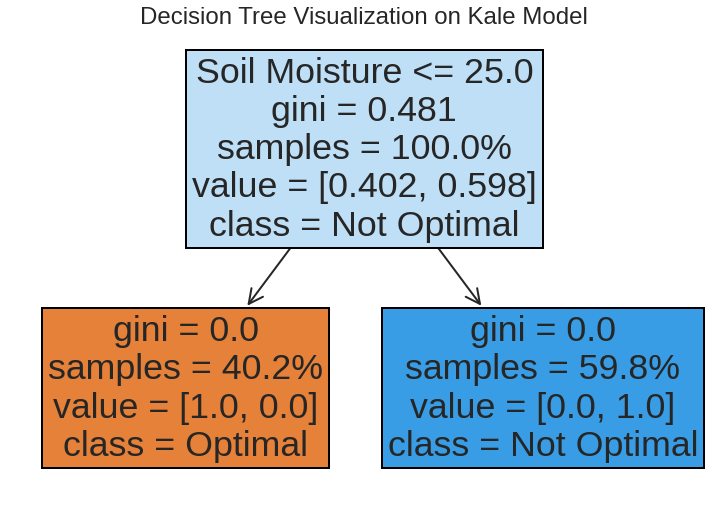


Text Explanation on Kale
|--- Soil Moisture <= 25.00
|   |--- weights: [17403.00, 0.00] class: Not Optimal
|--- Soil Moisture >  25.00
|   |--- weights: [0.00, 25906.00] class: Optimal



<Figure size 921.6x633.6 with 0 Axes>

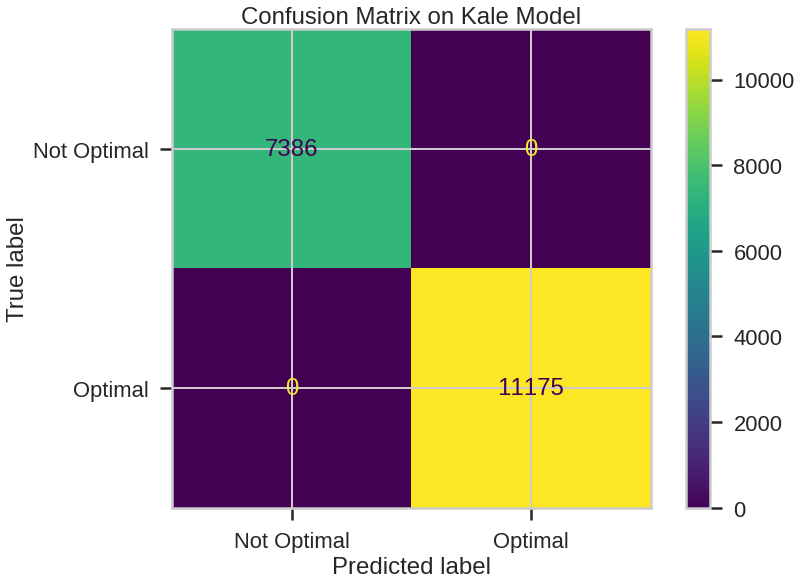


Graph Visualization on Seledri


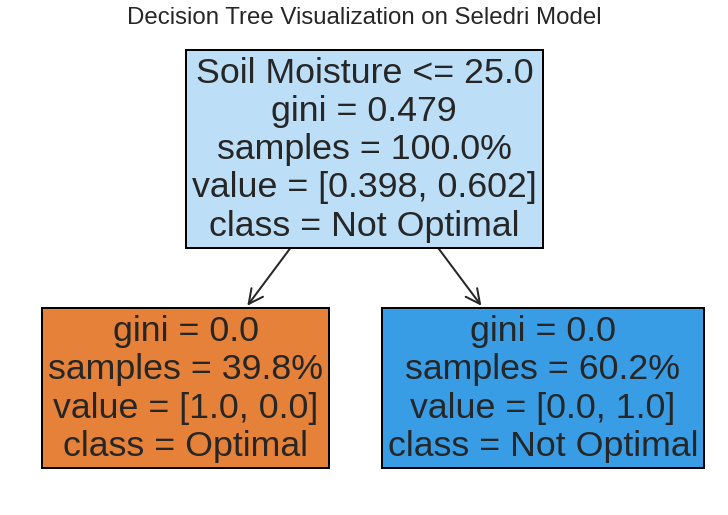


Text Explanation on Seledri
|--- Soil Moisture <= 25.00
|   |--- weights: [16216.00, 0.00] class: Not Optimal
|--- Soil Moisture >  25.00
|   |--- weights: [0.00, 24559.00] class: Optimal



<Figure size 921.6x633.6 with 0 Axes>

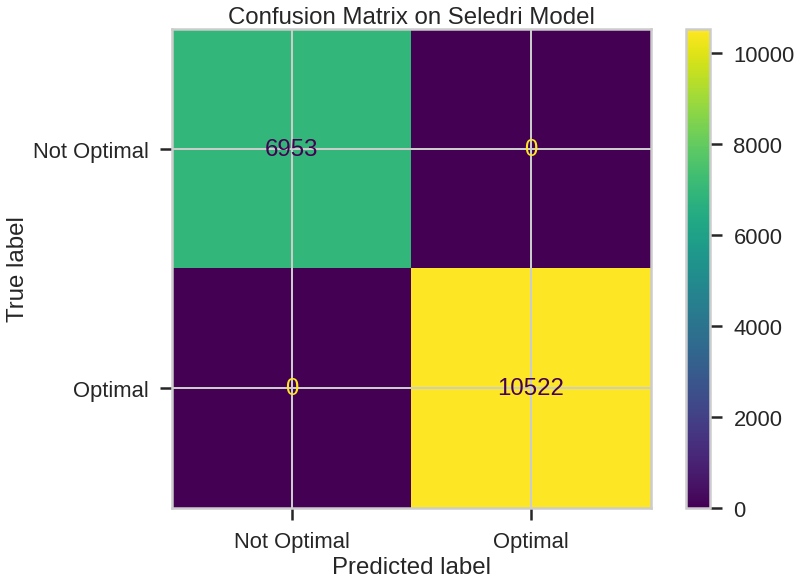

In [53]:
from sklearn import tree
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# model analysis
saved_model_path = {
    'kale' : '../trained/kale_dt_model.sav',
    'seledri' : '../trained/seledri_dt_model.sav'
}

# prepare training and testing data
training_features_column = ['temperature', 'humidity', 'light_intensity', 'soil_moisture_encode']
target_column = ['status']
list_plant_name = ['kale', 'seledri']
X_train = {}
X_test = {}
y_train = {}
y_test = {}
for plant_name in list_plant_name:
    # Split dataset into training set and test set
    X_train[plant_name], X_test[plant_name], y_train[plant_name], y_test[plant_name] = train_test_split(
        pre_processing_data[plant_name][training_features_column], pre_processing_data[plant_name][target_column],
        test_size=0.3)

# load model
loaded_model_list = []
for plant_name, saved_path in saved_model_path.items():
    trained_model = pickle.load(open(saved_path, 'rb'))

    # show plot parameter
    print(f"\n{'='*100}") # space
    print(f"Graph Visualization on {plant_name.title()}")
    plt.figure()
    tree.plot_tree(trained_model, class_names=["Optimal", "Not Optimal"], feature_names=["Temperature","Humidity","Light Intensity","Soil Moisture"], filled=True, proportion=True)
    plt.title(f"Decision Tree Visualization on {plant_name.title()} Model")
    plt.savefig('images/{}_{}.png'.format("dt_result_graph_gini",plant_name), dpi=100)
    plt.show()

    print(f"\n{'='*100}") # space
    print(f"Text Explanation on {plant_name.title()}")
    text_representation = tree.export_text(trained_model, feature_names=["Temperature","Humidity","Light Intensity","Soil Moisture"], show_weights=True)
    print(text_representation)


    #Predict the response for test dataset
    y_pred = trained_model.predict(X_test[plant_name])
    cm = confusion_matrix(y_test[plant_name], y_pred,  labels=trained_model.classes_)
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=trained_model.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix on {plant_name.title()} Model")
    plt.savefig('images/{}_{}.png'.format("confusion_matrix",plant_name), dpi=100)
    plt.show()